In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Постановка проблемы

Предположим, к нам попали данные исследований нескольких (пусть n=3) вакцин;  
В каждом исследовании собирались данные о респондентах, с которых через 1 / 10 / 100 часов собирали оценку самочувствия  

In [3]:
respondents = 1000

def make_research():
  research = {
      "gender": np.random.randint(0,2,respondents),            # 0 - m, 1 - f
      "age": np.random.normal(25.0,20.0,respondents),
      "height": np.random.normal(170.0,15.5,respondents),
      "weight": np.random.normal(65.0,25.0,respondents)
      }

  feeled_bad = 0                                                # считаем, сколько всего людей ощутили себя плохо

  part = np.random.randint(7,20,1)                              # доля респондентов, которые будут подвержены плохому самочувствию
  feeled_bad += part

  research["condition_after_1"] = np.random.normal(
      (5 *                                                      # мат. ожидание сдвигается: если бы исследования и не было, в среднем все ставили бы ровно 5, 
       (respondents * (1 - part/100)) +                         # но теперь 5 в среднем поставят меньшее число людей
       1 * (respondents * part/100))                            # остальные захотят поставить 1.5 
      / respondents,  
                                                                                                                                                                    
      2.0, 
      respondents
      )

  got_better = 1 if np.random.randint(0,10,1) > 7 else -1       # будем считать, что люди более склонны иметь ухудшившееся самочувствие через какое-то время
  part = np.random.randint(
      7 - (got_better * 2),
      20 - (got_better * 5),
      1) 
  feeled_bad += part

  research["condition_after_10"] = np.random.normal(
      (5 *                                        
       (respondents * (1 - part/100)) +           
       1 * (respondents * part/100))             
      / respondents,  
                                                                                                                                                                    
      1.0, 
      respondents
      )

  got_better = 1 if np.random.randint(0,10,1) > 3 else -1       # будем считать, что люди более склонны иметь улучшившееся самочувствие через продолжительное время
  part = np.random.randint(
      7 - (got_better * 3),
      20 - (got_better * 7),
      1)
  feeled_bad += part

  research["condition_after_100"] = np.random.normal(
      (5 *                                        
       (respondents * (1 - part/100)) +           
       1 * (respondents * part/100))            
      / respondents,  
                                                                                                                                                                    
      2.5, 
      respondents
      )
  
  return research

In [202]:
researh_0 = make_research()

In [203]:
researh_1 = make_research()

In [204]:
researh_2 = make_research()

In [205]:
reserchres = [researh_0, researh_1, researh_2]

In [206]:
type(values)

dict_values

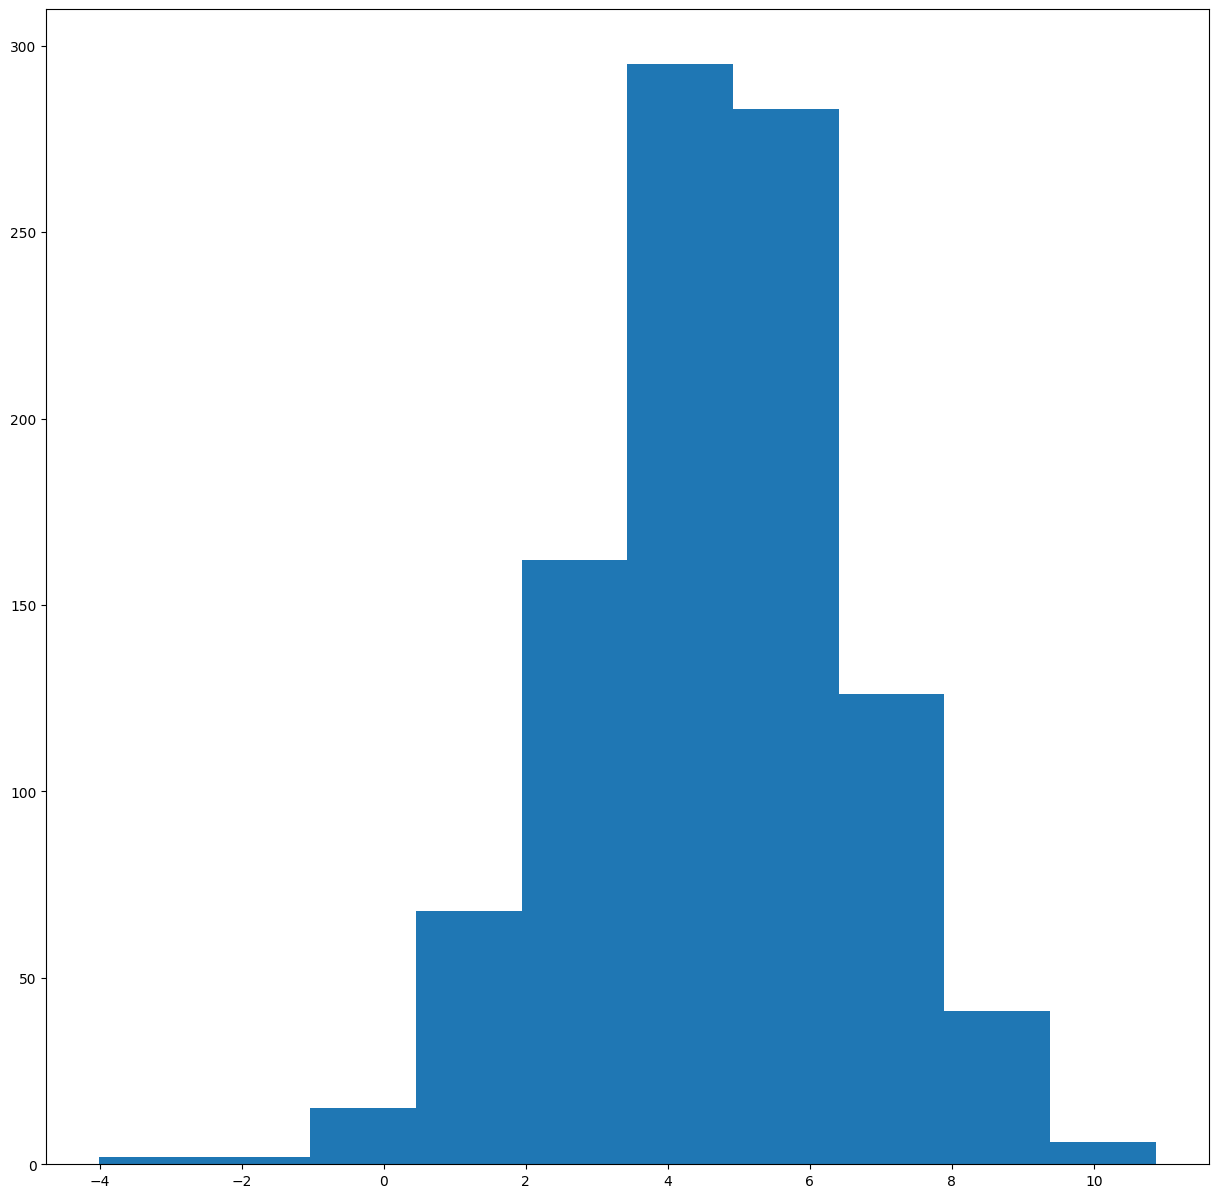

In [207]:
_ =plt.hist(researh_0["condition_after_1"])

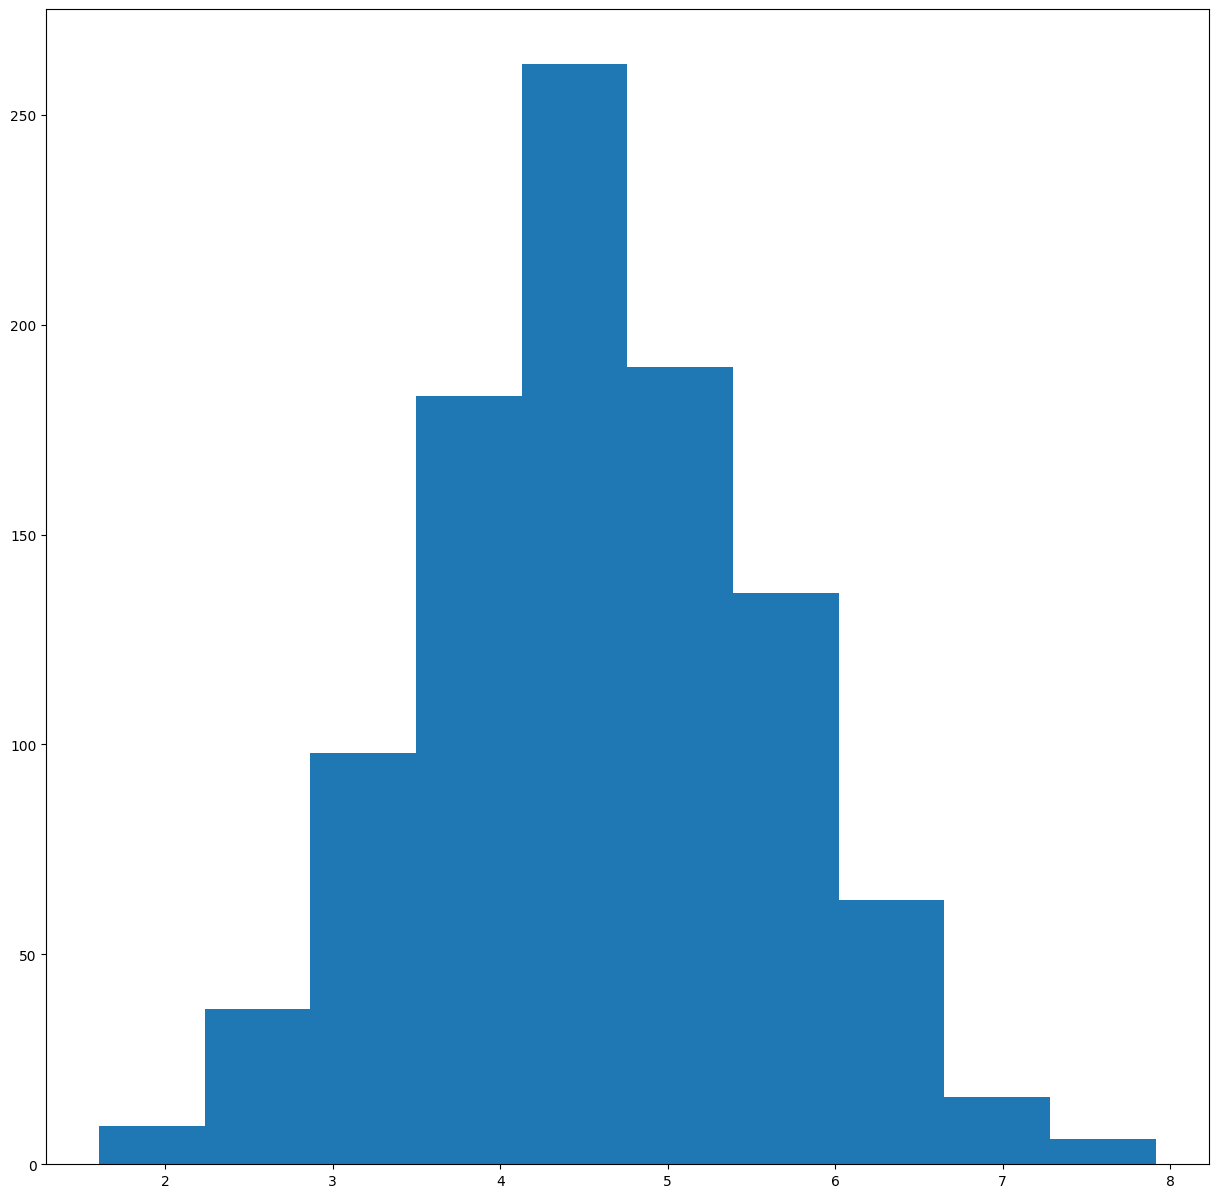

In [208]:
_ =plt.hist(researh_0["condition_after_10"])

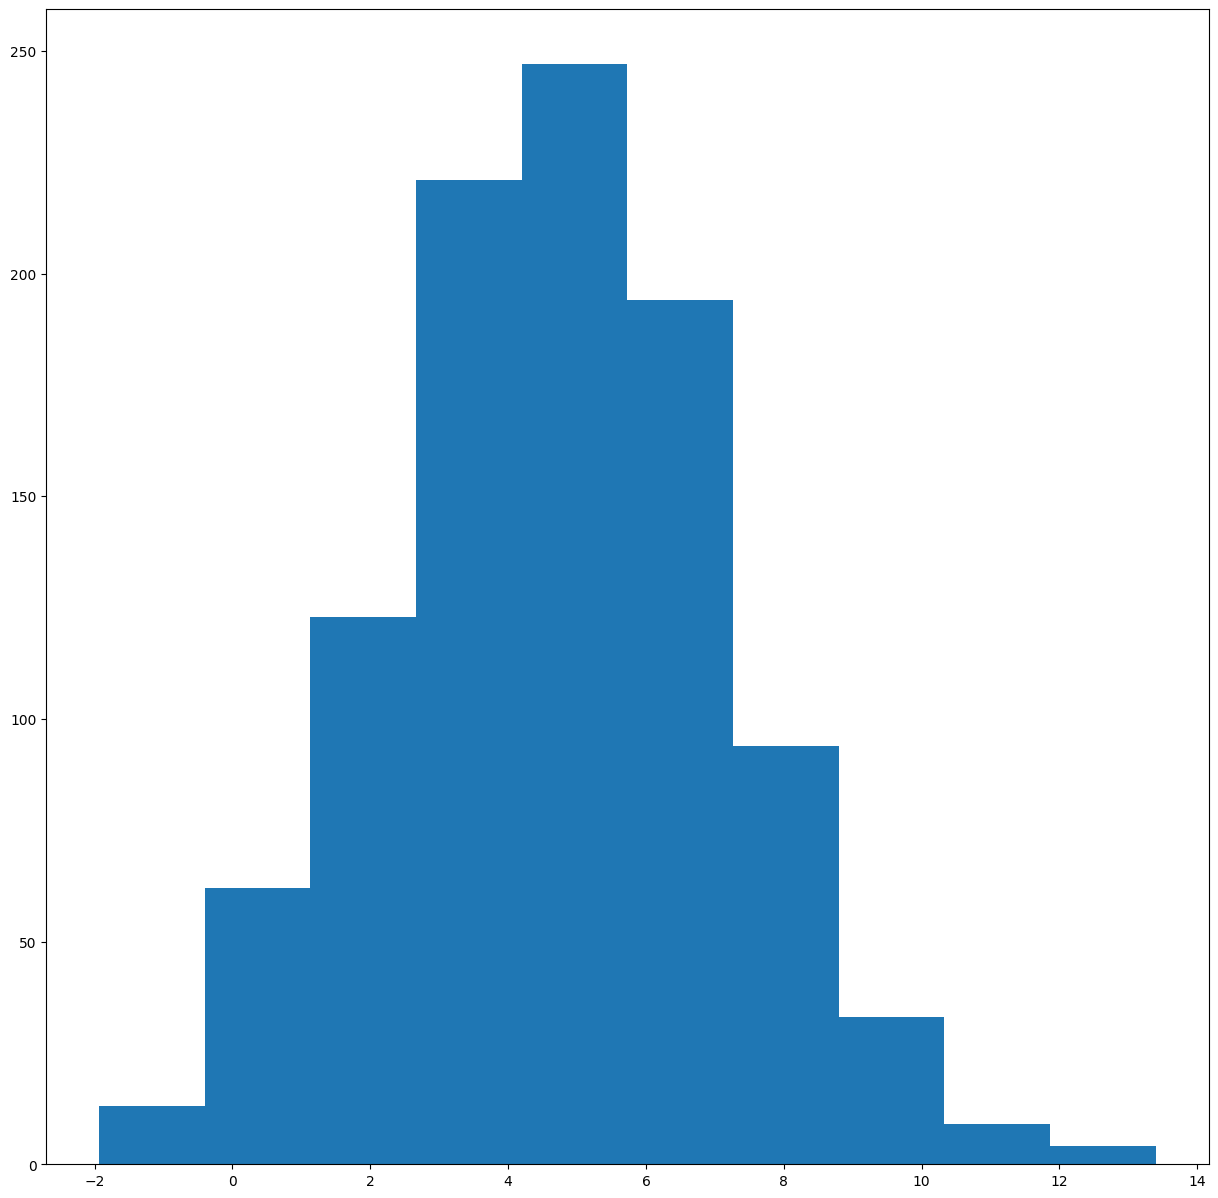

In [209]:
_ =plt.hist(researh_0["condition_after_100"])

# Задание

Мы хотим:
- проверить, что с данными все в порядке (т.к. данные генерили с помощью распределений, у нас могут быть отрицательные числа, которые надо исправить на 0, а также числа больше 10, которые надо исправить на 10)
- сравнить между собой результаты исследований разных вакцин
- каким-либо образом представить сравнение исследований (т.е., к примеру, показать в одном пространстве сразу 3 исследования, пользуясь признаками "средняя оценка самочувствия после 1 часа", "средняя оценка самочувствия после 10 часов", "средняя оценка самочувствия после 100 часов"

In [211]:
for i in researh_0:
    print(i)

gender
age
height
weight
condition_after_1
condition_after_10
condition_after_100


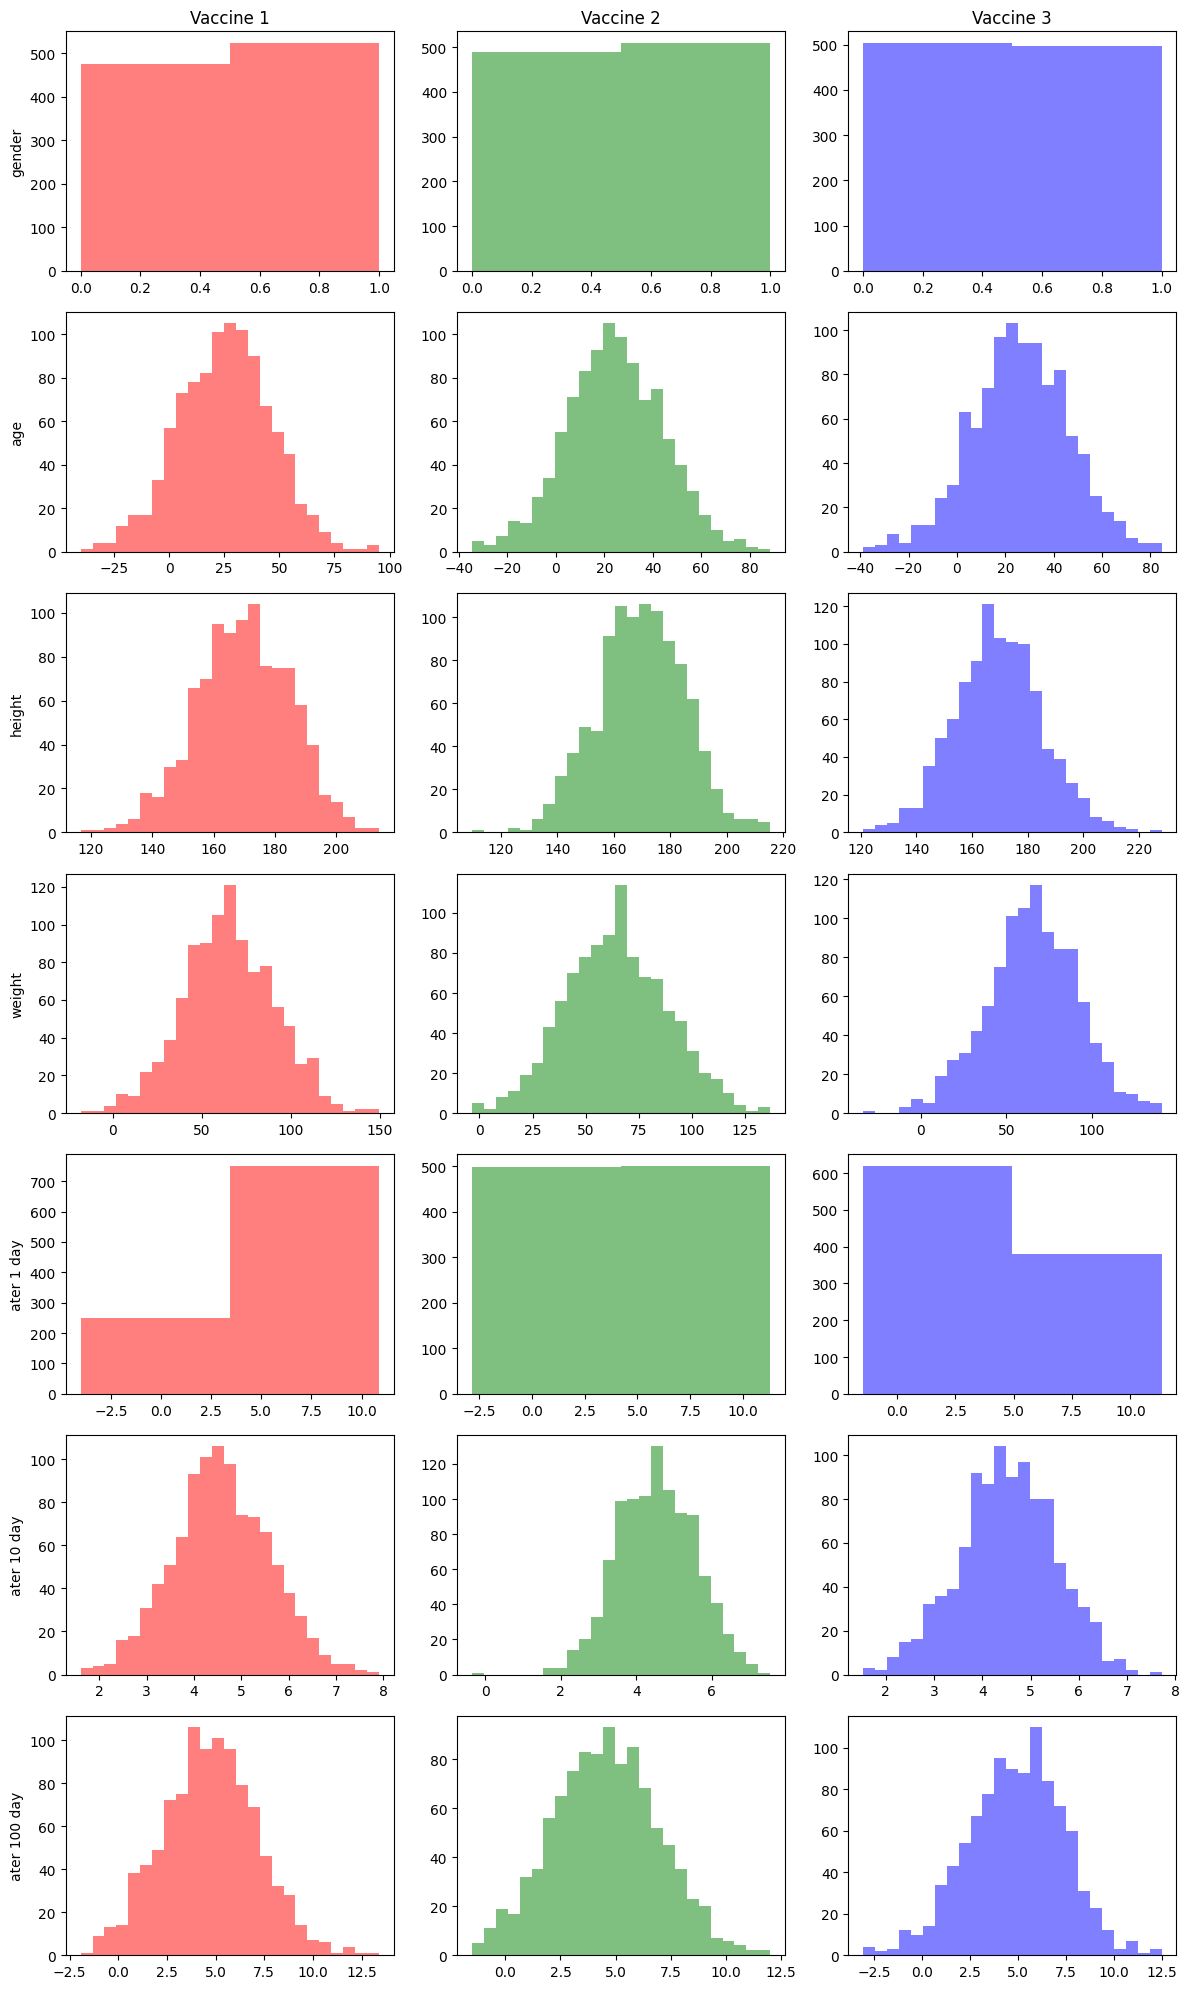

In [212]:
fig=plt.figure(figsize=(12,20))
#plt.figure(figsize=(5,8))

ax=fig.add_subplot(731)
plt.title('Vaccine 1')
ax.set_ylabel('gender')
n, bins, patches = plt.hist(researh_0.get('gender'), 2, facecolor='r', alpha=0.5)

ax=fig.add_subplot(732)
plt.title('Vaccine 2')
n, bins, patches = plt.hist(researh_1.get('gender'), 2, facecolor='g', alpha=0.5)

ax=fig.add_subplot(733)
plt.title('Vaccine 3')
n, bins, patches = plt.hist(researh_2.get('gender'), 2, facecolor='b', alpha=0.5)

ax=fig.add_subplot(734)
ax.set_ylabel('age')
n, bins, patches = plt.hist(researh_0.get('age'), 25, facecolor='r', alpha=0.5)
ax=fig.add_subplot(735)
n, bins, patches = plt.hist(researh_1.get('age'), 25, facecolor='g', alpha=0.5)
ax=fig.add_subplot(736)
n, bins, patches = plt.hist(researh_2.get('age'), 25, facecolor='b', alpha=0.5)

ax=fig.add_subplot(737)
ax.set_ylabel('height')
n, bins, patches = plt.hist(researh_0.get('height'), 25, facecolor='r', alpha=0.5)
ax=fig.add_subplot(738)
n, bins, patches = plt.hist(researh_1.get('height'), 25, facecolor='g', alpha=0.5)
ax=fig.add_subplot(739)
n, bins, patches = plt.hist(researh_2.get('height'), 25, facecolor='b', alpha=0.5)

#fig=plt.figure(2)
ax=fig.add_subplot(7,3,10)
ax.set_ylabel('weight')
n, bins, patches = plt.hist(researh_0.get('weight'), 25, facecolor='r', alpha=0.5)
ax=fig.add_subplot(7,3,11)
n, bins, patches = plt.hist(researh_1.get('weight'), 25, facecolor='g', alpha=0.5)
ax=fig.add_subplot(7,3,12)
n, bins, patches = plt.hist(researh_2.get('weight'), 25, facecolor='b', alpha=0.5)

ax=fig.add_subplot(7,3,13)
ax.set_ylabel('ater 1 day')
n, bins, patches = plt.hist(researh_0.get('condition_after_1'), 2, facecolor='r', alpha=0.5)

ax=fig.add_subplot(7,3,14)
# plt.title('Vaccine 2')
n, bins, patches = plt.hist(researh_1.get('condition_after_1'), 2, facecolor='g', alpha=0.5)

ax=fig.add_subplot(7,3,15)
# plt.title('Vaccine 3')
n, bins, patches = plt.hist(researh_2.get('condition_after_1'), 2, facecolor='b', alpha=0.5)

ax=fig.add_subplot(7,3,16)
ax.set_ylabel('ater 10 day')
n, bins, patches = plt.hist(researh_0.get('condition_after_10'), 25, facecolor='r', alpha=0.5)
ax=fig.add_subplot(7,3,17)
n, bins, patches = plt.hist(researh_1.get('condition_after_10'), 25, facecolor='g', alpha=0.5)
ax=fig.add_subplot(7,3,18)
n, bins, patches = plt.hist(researh_2.get('condition_after_10'), 25, facecolor='b', alpha=0.5)

ax=fig.add_subplot(7,3,19)
ax.set_ylabel('ater 100 day')
n, bins, patches = plt.hist(researh_0.get('condition_after_100'), 25, facecolor='r', alpha=0.5)
ax=fig.add_subplot(7,3,20)
n, bins, patches = plt.hist(researh_1.get('condition_after_100'), 25, facecolor='g', alpha=0.5)
ax=fig.add_subplot(7,3,21)
n, bins, patches = plt.hist(researh_2.get('condition_after_100'), 25, facecolor='b', alpha=0.5)

plt.tight_layout()


In [213]:
#убираем 0 и все что больше 10
for researh in reserchres:
    for i in researh:
        researh.get(i)[researh.get(i)<0] = 0
        if i == 'condition_after_1' or i =='condition_after_10' or i =='condition_after_100':
            researh.get(i)[researh.get(i)>10] = 10
        # researh.get(condition_after_10)[researh.get(condition_after_10)>10] = 10
        # researh.get(condition_after_100)[researh.get(condition_after_100)>10] = 10

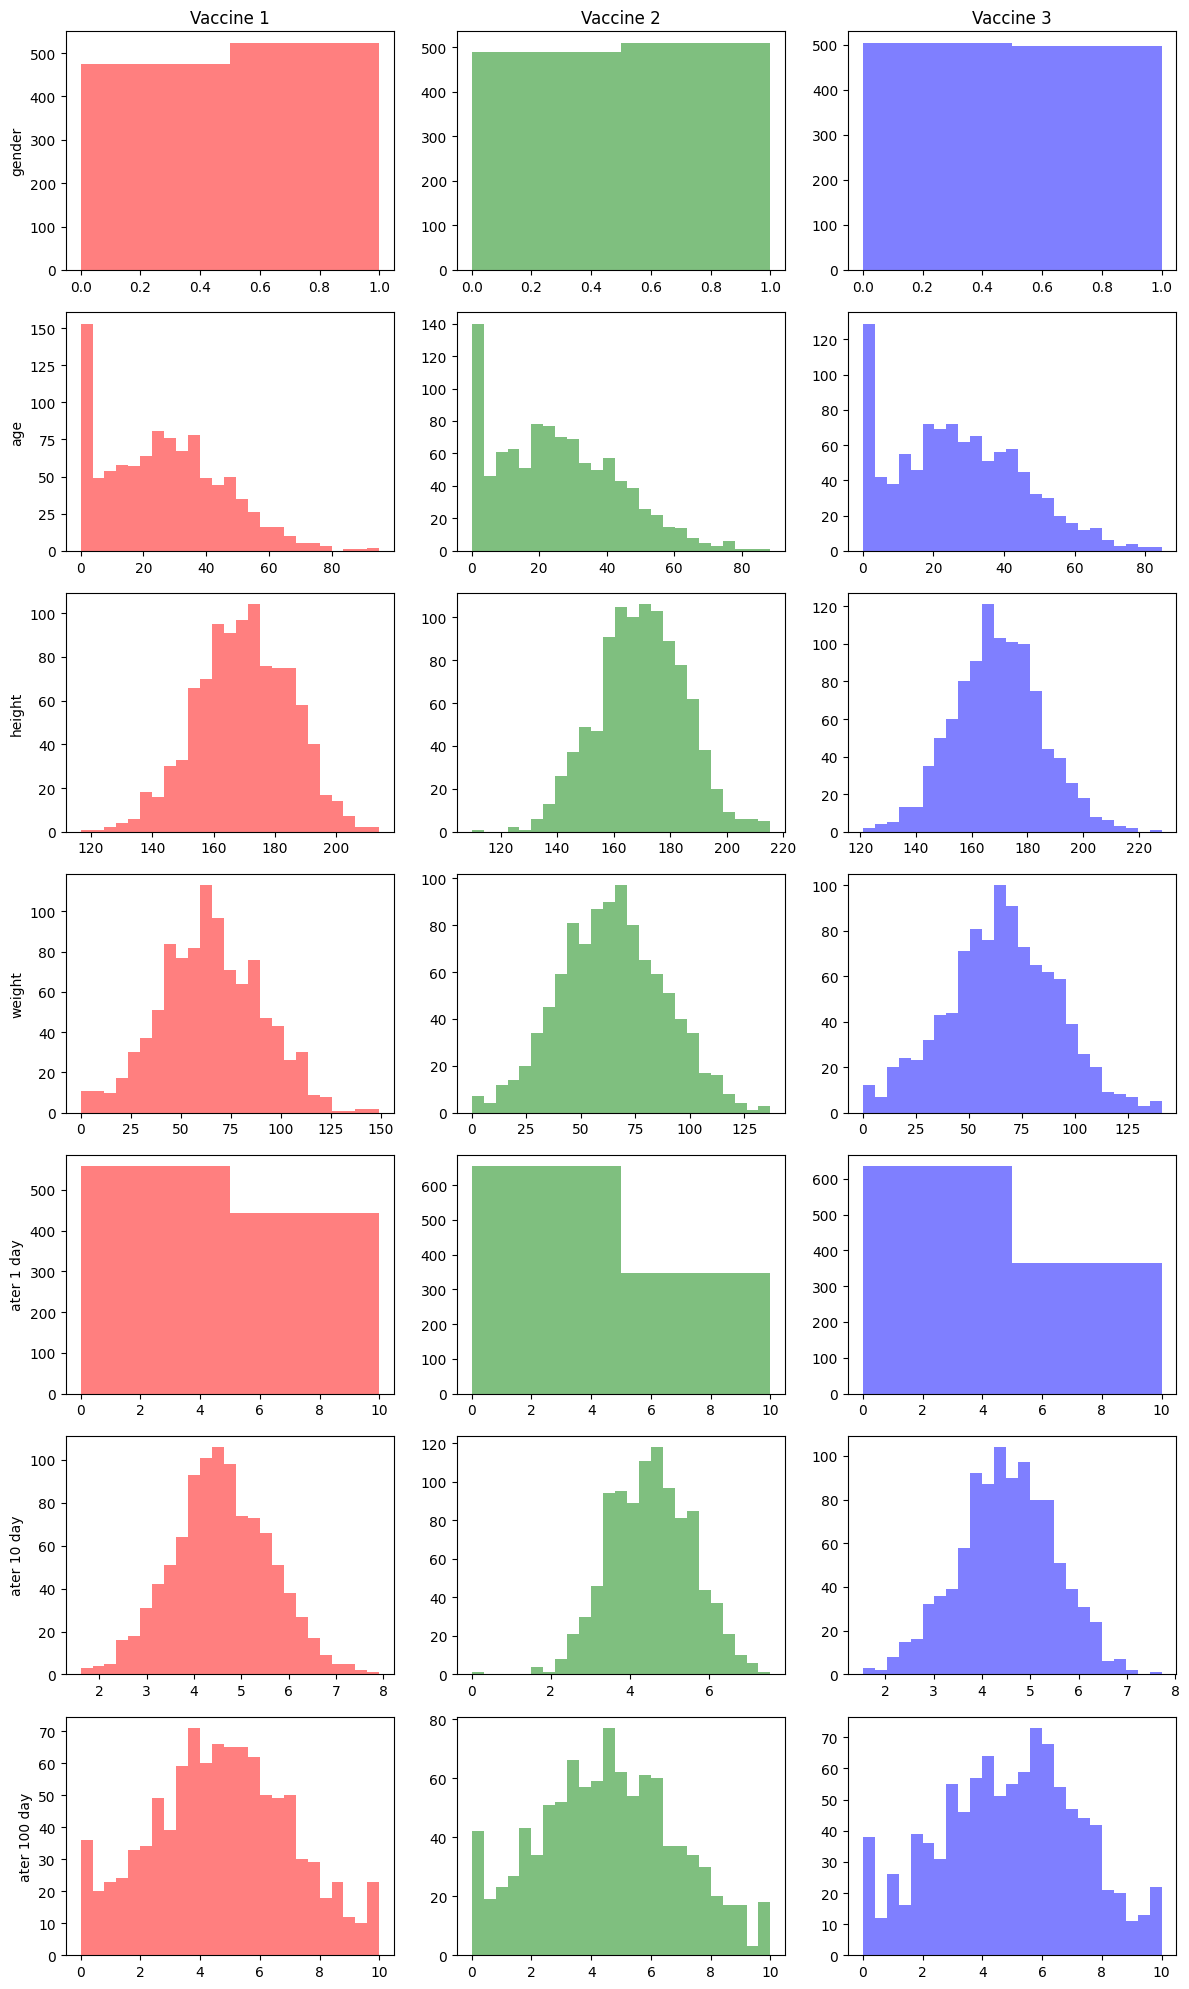

In [214]:
fig=plt.figure(figsize=(12,20))
#plt.figure(figsize=(5,8))

ax=fig.add_subplot(731)
plt.title('Vaccine 1')
ax.set_ylabel('gender')
n, bins, patches = plt.hist(researh_0.get('gender'), 2, facecolor='r', alpha=0.5)

ax=fig.add_subplot(732)
plt.title('Vaccine 2')
n, bins, patches = plt.hist(researh_1.get('gender'), 2, facecolor='g', alpha=0.5)

ax=fig.add_subplot(733)
plt.title('Vaccine 3')
n, bins, patches = plt.hist(researh_2.get('gender'), 2, facecolor='b', alpha=0.5)

ax=fig.add_subplot(734)
ax.set_ylabel('age')
n, bins, patches = plt.hist(researh_0.get('age'), 25, facecolor='r', alpha=0.5)
ax=fig.add_subplot(735)
n, bins, patches = plt.hist(researh_1.get('age'), 25, facecolor='g', alpha=0.5)
ax=fig.add_subplot(736)
n, bins, patches = plt.hist(researh_2.get('age'), 25, facecolor='b', alpha=0.5)

ax=fig.add_subplot(737)
ax.set_ylabel('height')
n, bins, patches = plt.hist(researh_0.get('height'), 25, facecolor='r', alpha=0.5)
ax=fig.add_subplot(738)
n, bins, patches = plt.hist(researh_1.get('height'), 25, facecolor='g', alpha=0.5)
ax=fig.add_subplot(739)
n, bins, patches = plt.hist(researh_2.get('height'), 25, facecolor='b', alpha=0.5)

#fig=plt.figure(2)
ax=fig.add_subplot(7,3,10)
ax.set_ylabel('weight')
n, bins, patches = plt.hist(researh_0.get('weight'), 25, facecolor='r', alpha=0.5)
ax=fig.add_subplot(7,3,11)
n, bins, patches = plt.hist(researh_1.get('weight'), 25, facecolor='g', alpha=0.5)
ax=fig.add_subplot(7,3,12)
n, bins, patches = plt.hist(researh_2.get('weight'), 25, facecolor='b', alpha=0.5)

ax=fig.add_subplot(7,3,13)
ax.set_ylabel('ater 1 day')
n, bins, patches = plt.hist(researh_0.get('condition_after_1'), 2, facecolor='r', alpha=0.5)

ax=fig.add_subplot(7,3,14)
# plt.title('Vaccine 2')
n, bins, patches = plt.hist(researh_1.get('condition_after_1'), 2, facecolor='g', alpha=0.5)

ax=fig.add_subplot(7,3,15)
# plt.title('Vaccine 3')
n, bins, patches = plt.hist(researh_2.get('condition_after_1'), 2, facecolor='b', alpha=0.5)

ax=fig.add_subplot(7,3,16)
ax.set_ylabel('ater 10 day')
n, bins, patches = plt.hist(researh_0.get('condition_after_10'), 25, facecolor='r', alpha=0.5)
ax=fig.add_subplot(7,3,17)
n, bins, patches = plt.hist(researh_1.get('condition_after_10'), 25, facecolor='g', alpha=0.5)
ax=fig.add_subplot(7,3,18)
n, bins, patches = plt.hist(researh_2.get('condition_after_10'), 25, facecolor='b', alpha=0.5)

ax=fig.add_subplot(7,3,19)
ax.set_ylabel('ater 100 day')
n, bins, patches = plt.hist(researh_0.get('condition_after_100'), 25, facecolor='r', alpha=0.5)
ax=fig.add_subplot(7,3,20)
n, bins, patches = plt.hist(researh_1.get('condition_after_100'), 25, facecolor='g', alpha=0.5)
ax=fig.add_subplot(7,3,21)
n, bins, patches = plt.hist(researh_2.get('condition_after_100'), 25, facecolor='b', alpha=0.5)

plt.tight_layout()


In [215]:

v1_averages_condition=np.array([np.average(researh_0.get('condition_after_1')), np.average(researh_0.get('condition_after_10')), np.average(researh_0.get('condition_after_100'))])
v1_averages_condition=np.append(v1_averages_condition, np.average(v1_averages_condition))
                                                                                
v2_averages_condition=np.array([np.average(researh_1.get('condition_after_1')), np.average(researh_1.get('condition_after_10')), np.average(researh_1.get('condition_after_100'))])
v2_averages_condition=np.append(v2_averages_condition, np.average(v2_averages_condition))
                                                                                
v3_averages_condition=np.array([np.average(researh_2.get('condition_after_1')), np.average(researh_2.get('condition_after_10')), np.average(researh_2.get('condition_after_100'))])
v3_averages_condition=np.append(v3_averages_condition, np.average(v3_averages_condition))

In [216]:
v2_averages_condition

array([4.19027553, 4.53453515, 4.55420206, 4.42633758])

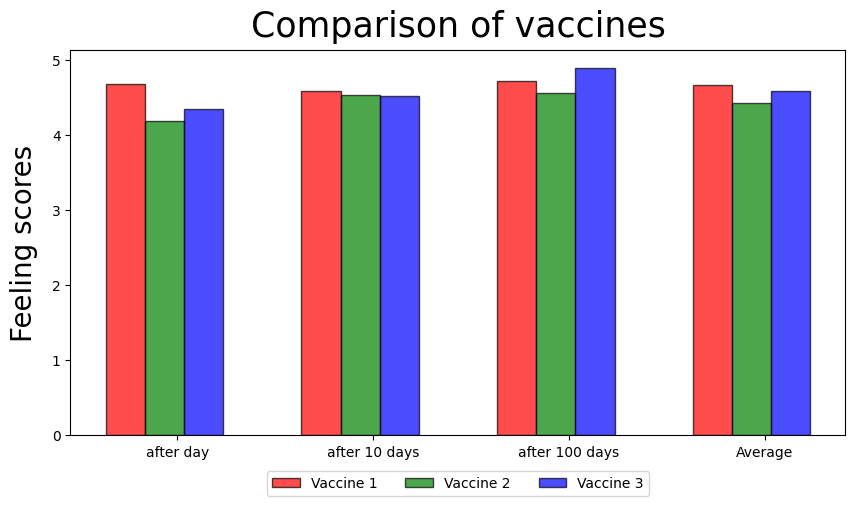

In [217]:
                               
_, ax = plt.subplots(figsize=(10,5))
index = np.arange(4)
bar_width = 0.2
opacity = 0.7

ax.bar(index -bar_width   , v1_averages_condition, bar_width, alpha=opacity, color='r', label='Vaccine 1', edgecolor = "black")
ax.bar(index, v2_averages_condition, bar_width, alpha=opacity, color='g', label='Vaccine 2',edgecolor = "black")
ax.bar(index + bar_width, v3_averages_condition, bar_width, alpha=opacity, color='b', label='Vaccine 3', edgecolor = "black")

ax.set_ylabel('Feeling scores',fontsize = 20, labelpad = 10)
ax.set_title('Comparison of vaccines',fontsize = 25, pad = 10)
ax.set_xticks(index + bar_width  / 3) 
ax.set_xticklabels(('after day', 'after 10 days', 'after 100 days', 'Average'))
ax.legend(loc = 'upper center', ncol=3, bbox_to_anchor=(0.5,-0.075))